# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [2]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


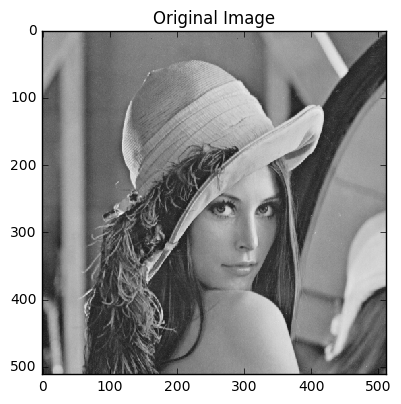

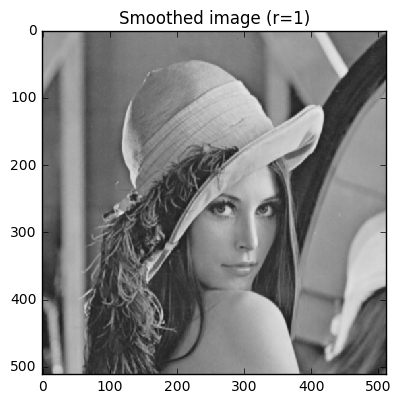

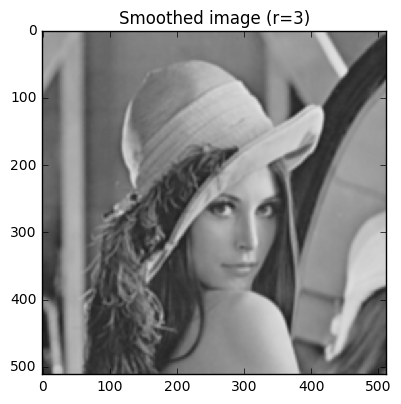

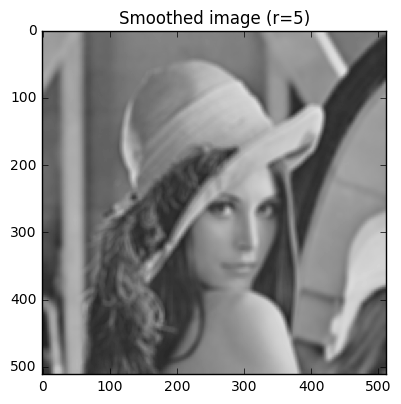

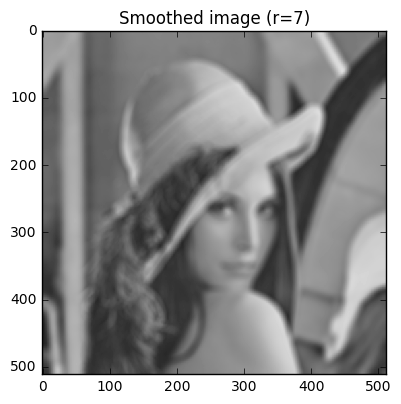

In [3]:
from skimage.morphology import disk #Import the disk and the mean function from the skimage library
from skimage.filters.rank import mean

lena_mean1 = mean(lena_im, disk(1))#Apply the mean function to the image using different size of disk
lena_mean3 = mean(lena_im, disk(3))
lena_mean5 = mean(lena_im, disk(5))
lena_mean7 = mean(lena_im, disk(7))

plt.figure() #For image, I plot it and i add a title
io.imshow(lena_im)
plt.title('Original Image')
plt.figure()
io.imshow(lena_mean1)
plt.title('Smoothed image (r=1)')
plt.figure()
io.imshow(lena_mean3)
plt.title('Smoothed image (r=3)')
plt.figure()
io.imshow(lena_mean5)
plt.title('Smoothed image (r=5)')
plt.figure()
io.imshow(lena_mean7)
plt.title('Smoothed image (r=7)')

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


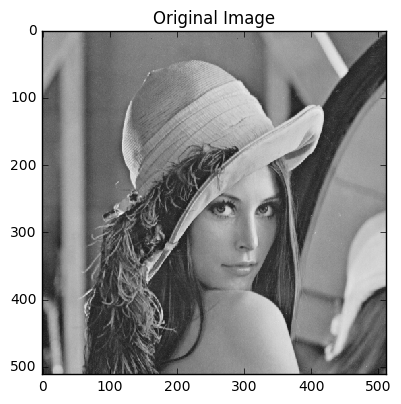

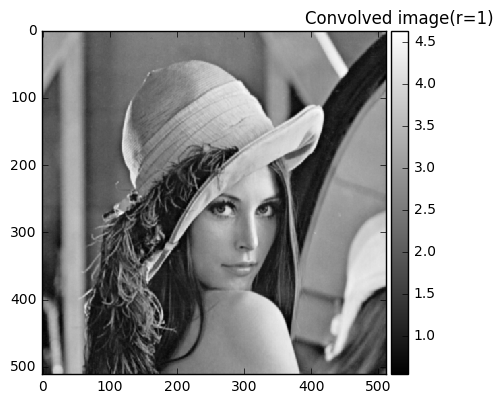

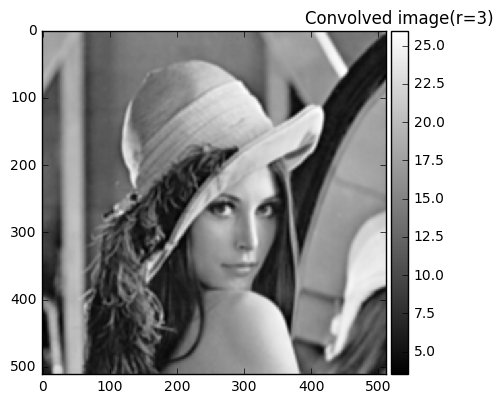

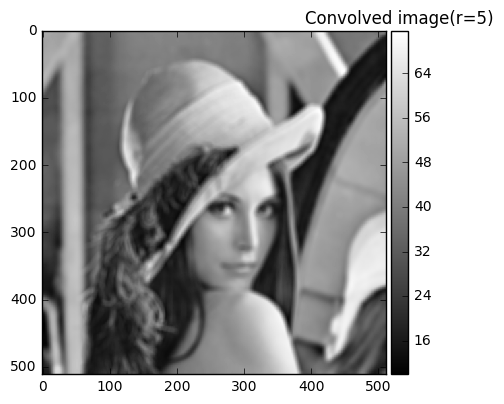

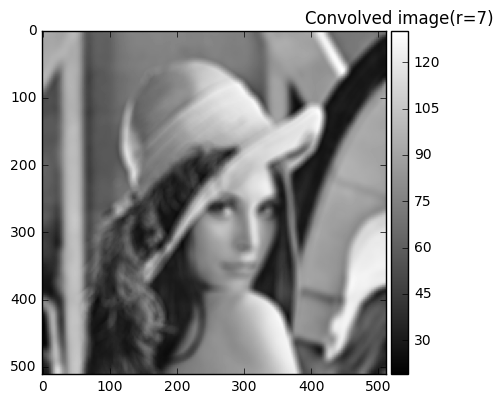

In [4]:
from scipy import ndimage #Import the ndimage functions from the scipy library

lena_conv1=ndimage.convolve(lena_im, disk(1)) #Apply the convolution using different disk filters 
lena_conv3=ndimage.convolve(lena_im, disk(3))
lena_conv5=ndimage.convolve(lena_im, disk(5))
lena_conv7=ndimage.convolve(lena_im, disk(7))

plt.figure() #For each image, I plot it and add a title
io.imshow(lena_im, cmap=plt.cm.gray)
plt.title('Original Image')
plt.figure()
io.imshow(lena_conv1, cmap=plt.cm.gray)
plt.title('Convolved image(r=1)')
plt.figure()
io.imshow(lena_conv3, cmap=plt.cm.gray)
plt.title('Convolved image(r=3)')
plt.figure()
io.imshow(lena_conv5, cmap=plt.cm.gray)
plt.title('Convolved image(r=5)')
plt.figure()
io.imshow(lena_conv7, cmap=plt.cm.gray)
plt.title('Convolved image(r=7)')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [5]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

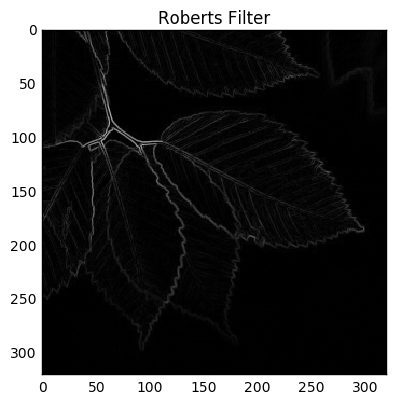

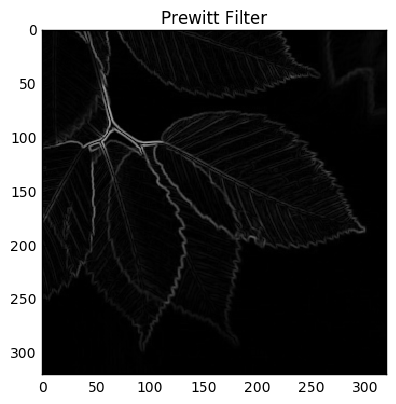

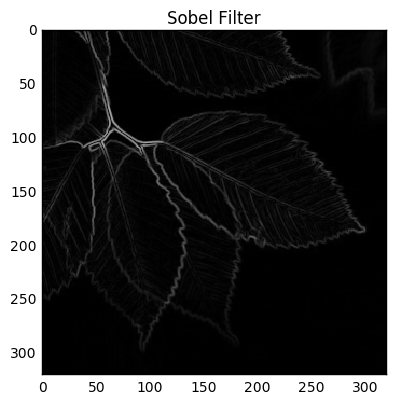

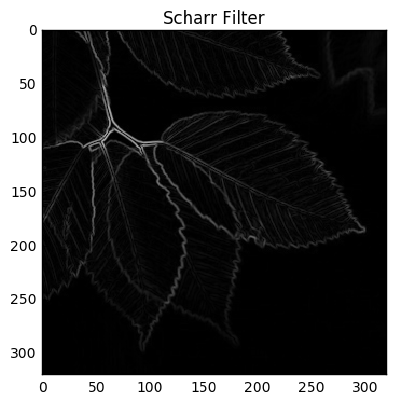

In [6]:
leaves_im = io.imread(Path.__add__('leaves.jpg')) #Import the 'leaves.jpg' image, convert it in float and in grayscale
leaves_im = img_as_float(leaves_im)
leaves_gray = color.rgb2gray(leaves_im)

leaves_rob = filters.roberts(leaves_gray) #Apply the different filters on the image
leaves_pre = filters.prewitt(leaves_gray)
leaves_sob = filters.sobel(leaves_gray)
leaves_sch = filters.scharr(leaves_gray)

plt.figure() #Plot all filtered images and add a title
io.imshow(leaves_rob, cmap=plt.cm.gray)
plt.title('Roberts Filter')
plt.figure()
io.imshow(leaves_pre, cmap=plt.cm.gray)
plt.title('Prewitt Filter')
plt.figure()
io.imshow(leaves_sob, cmap=plt.cm.gray)
plt.title('Sobel Filter')
plt.figure()
io.imshow(leaves_sch, cmap=plt.cm.gray)
plt.title('Scharr Filter')

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

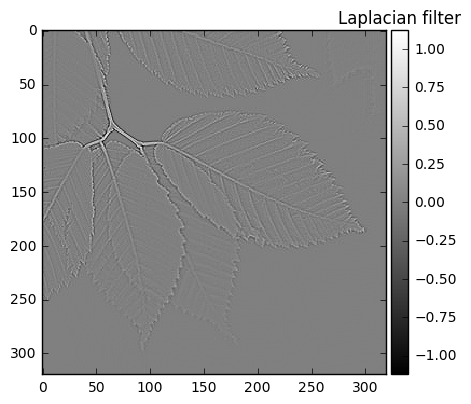

In [7]:
from scipy import ndimage #Import the ndimage functions from the scipy library

leaves_lap = ndimage.filters.laplace(leaves_gray) #Apply a laplacian filter on the image

plt.figure() #Plot the resulting image and add a title
io.imshow(leaves_lap, cmap=plt.cm.gray)
plt.title('Laplacian filter')

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [8]:
from skimage import util

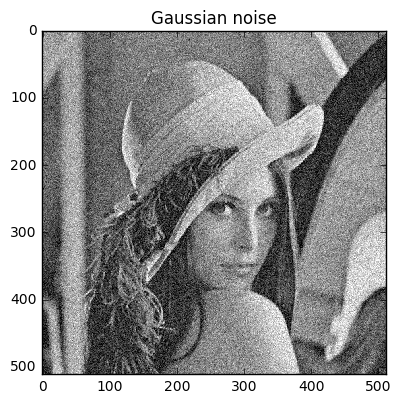

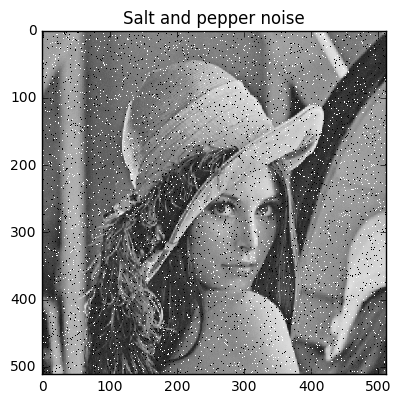

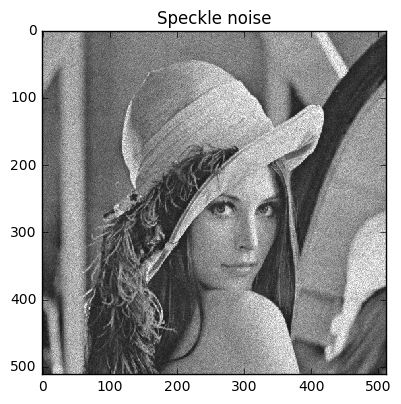

In [9]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


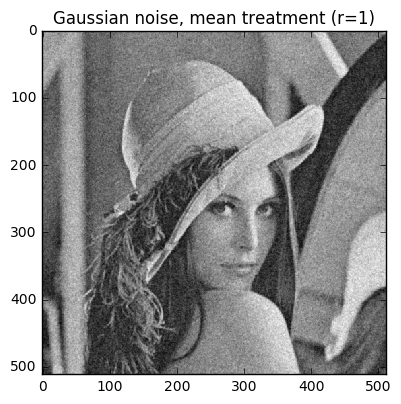

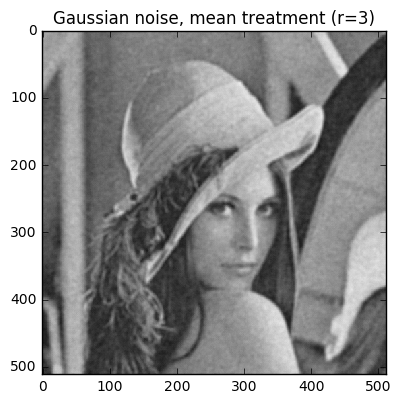

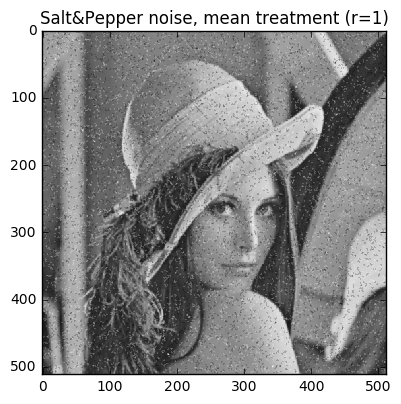

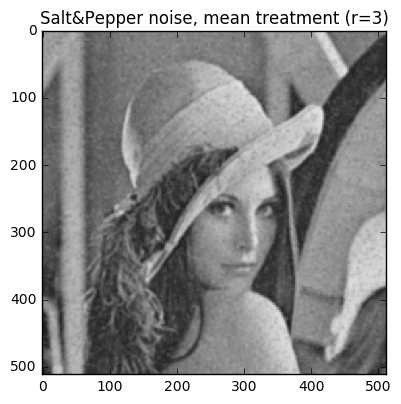

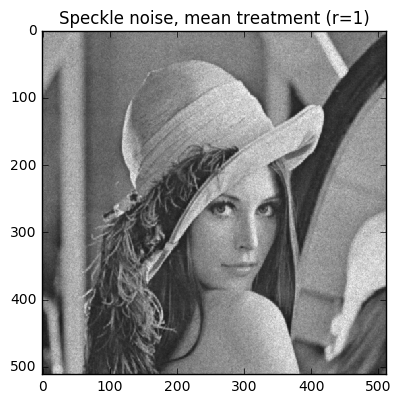

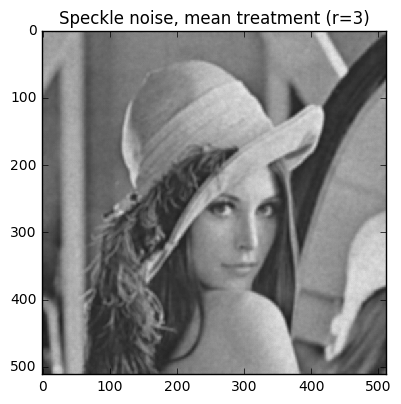

In [10]:
lena_gauss_mean1 = mean(lena_gaussian, disk(1)) #Apply to the different corrupted images, a mean filter (disk r=1 & 3)
lena_sp_mean1 = mean(lena_sp, disk(1))
lena_spe_mean1 = mean(lena_speckle, disk(1))
lena_gauss_mean3 = mean(lena_gaussian, disk(3))
lena_sp_mean3 = mean(lena_sp, disk(3))
lena_spe_mean3 = mean(lena_speckle, disk(3))

plt.figure() #Plot all the filtered images and add a title
io.imshow(lena_gauss_mean1)
plt.title('Gaussian noise, mean treatment (r=1)')
plt.figure()
io.imshow(lena_gauss_mean3)
plt.title('Gaussian noise, mean treatment (r=3)')
plt.figure()
io.imshow(lena_sp_mean1)
plt.title('Salt&Pepper noise, mean treatment (r=1)')
plt.figure()
io.imshow(lena_sp_mean3)
plt.title('Salt&Pepper noise, mean treatment (r=3)')
plt.figure()
io.imshow(lena_spe_mean1)
plt.title('Speckle noise, mean treatment (r=1)')
plt.figure()
io.imshow(lena_spe_mean3)
plt.title('Speckle noise, mean treatment (r=3)')

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


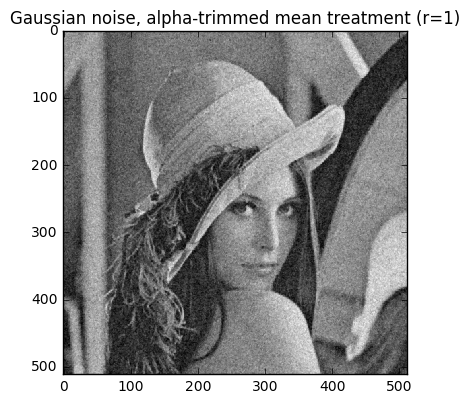

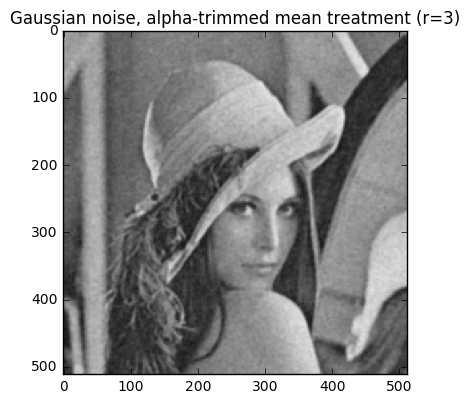

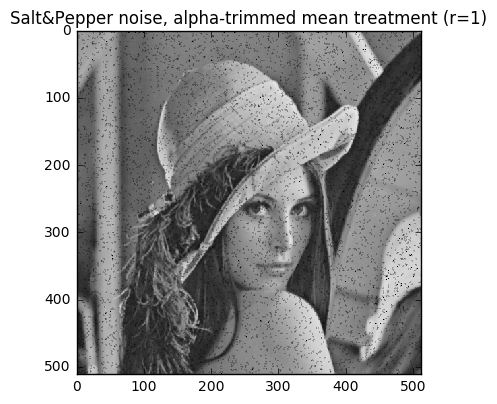

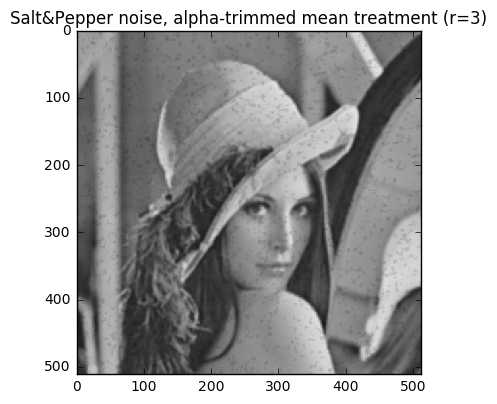

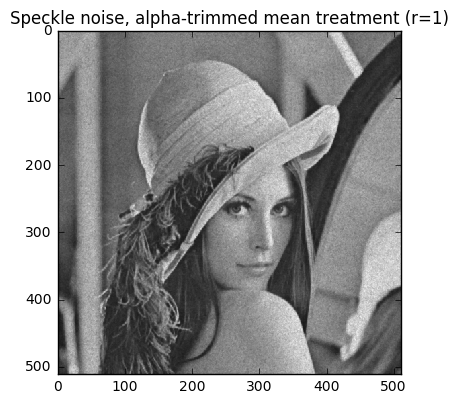

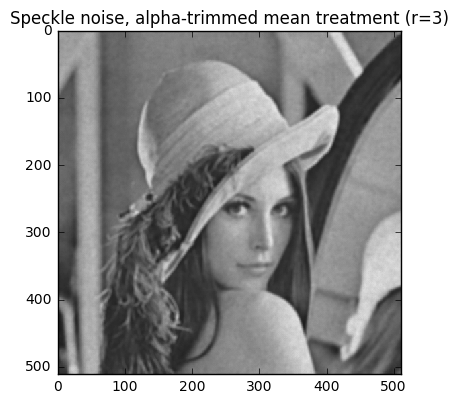

In [11]:
from skimage.filters.rank import mean_percentile #Import the mean_percentile function from the skimage library

lena_gauss_meant1=mean_percentile(lena_gaussian, disk(1), None, None, False, False, 0.05, 0.95) #Apply the alpha-trimmed mean filter to all the corrupted images (disk r=1 & r=3) between 0.05 and 0.95
lena_sp_meant1=mean_percentile(lena_sp, disk(1), None, None, False, False, 0.05, 0.95)
lena_spe_meant1=mean_percentile(lena_speckle, disk(1), None, None, False, False, 0.05, 0.95)
lena_gauss_meant3=mean_percentile(lena_gaussian, disk(3), None, None, False, False, 0.05, 0.95)
lena_sp_meant3=mean_percentile(lena_sp, disk(3), None, None, False, False, 0.05, 0.95)
lena_spe_meant3=mean_percentile(lena_speckle, disk(3), None, None, False, False, 0.05, 0.95)

plt.figure() #Plot all the filtered images and add a title
io.imshow(lena_gauss_meant1)
plt.title('Gaussian noise, alpha-trimmed mean treatment (r=1)')
plt.figure()
io.imshow(lena_gauss_meant3)
plt.title('Gaussian noise, alpha-trimmed mean treatment (r=3)')
plt.figure()
io.imshow(lena_sp_meant1)
plt.title('Salt&Pepper noise, alpha-trimmed mean treatment (r=1)')
plt.figure()
io.imshow(lena_sp_meant3)
plt.title('Salt&Pepper noise, alpha-trimmed mean treatment (r=3)')
plt.figure()
io.imshow(lena_spe_meant1)
plt.title('Speckle noise, alpha-trimmed mean treatment (r=1)')
plt.figure()
io.imshow(lena_spe_meant3)
plt.title('Speckle noise, alpha-trimmed mean treatment (r=3)')

** median filter: **

C:\Users\dreve\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


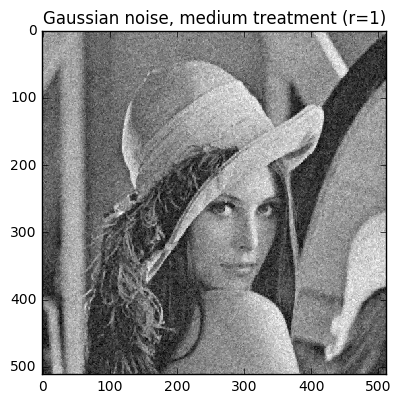

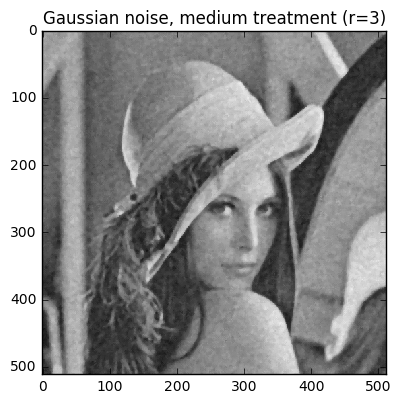

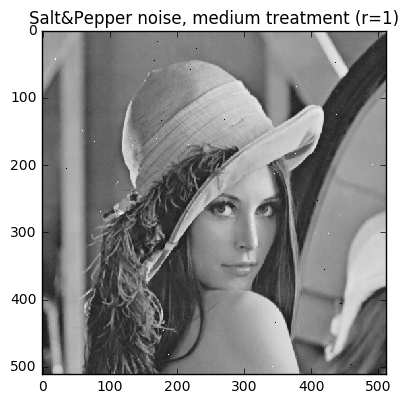

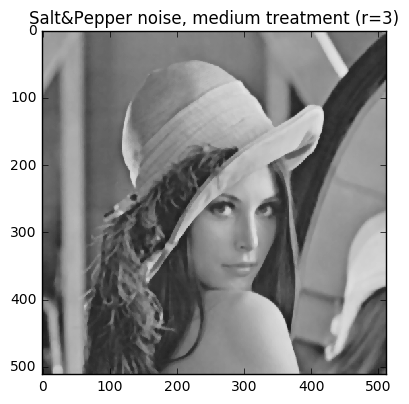

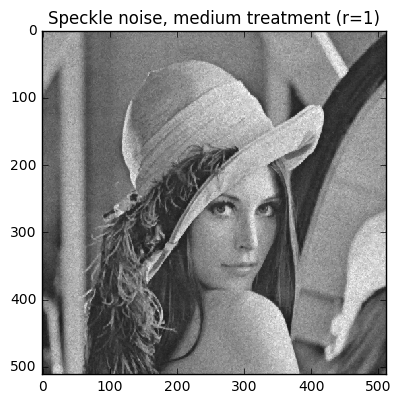

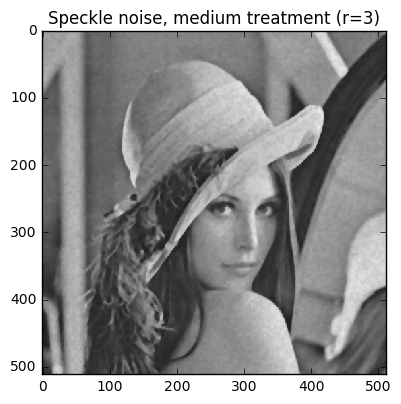

In [12]:
from skimage.filters.rank import median #Import the median function from the skimage library

lena_gauss_med1=median(lena_gaussian, disk(1))
lena_sp_med1=median(lena_sp, disk(1))
lena_spe_med1=median(lena_speckle, disk(1))
lena_gauss_med3=median(lena_gaussian, disk(3))
lena_sp_med3=median(lena_sp, disk(3))
lena_spe_med3=median(lena_speckle, disk(3))

plt.figure() #Plot all the filtered images and add a title
io.imshow(lena_gauss_med1)
plt.title('Gaussian noise, medium treatment (r=1)')
plt.figure()
io.imshow(lena_gauss_med3)
plt.title('Gaussian noise, medium treatment (r=3)')
plt.figure()
io.imshow(lena_sp_med1)
plt.title('Salt&Pepper noise, medium treatment (r=1)')
plt.figure()
io.imshow(lena_sp_med3)
plt.title('Salt&Pepper noise, medium treatment (r=3)')
plt.figure()
io.imshow(lena_spe_med1)
plt.title('Speckle noise, medium treatment (r=1)')
plt.figure()
io.imshow(lena_spe_med3)
plt.title('Speckle noise, medium treatment (r=3)')

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

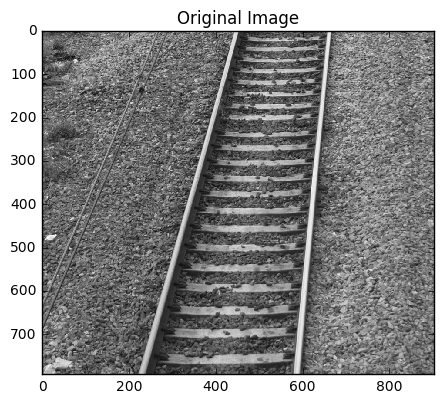

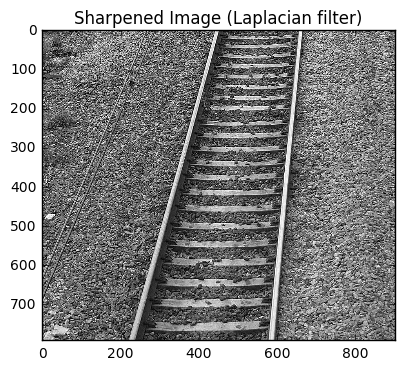

In [13]:
railway_im = io.imread(Path.__add__('railway.jpg')) #Import the railway image, convert it into float and in grayscale
railway_im = img_as_float(railway_im)
railway_gray = color.rgb2gray(railway_im)

railway_lap = ndimage.filters.laplace(railway_gray) #Apply a laplacian filter on the image

railway_sharp = railway_gray-railway_lap #Compute the sharpened image using the filtered image

plt.figure() #Plot the original and the Sharpened image and add a title
io.imshow(railway_gray, cmap=plt.cm.gray)
plt.title('Original Image')
plt.figure()
plt.imshow(railway_sharp, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Sharpened Image (Laplacian filter)')

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

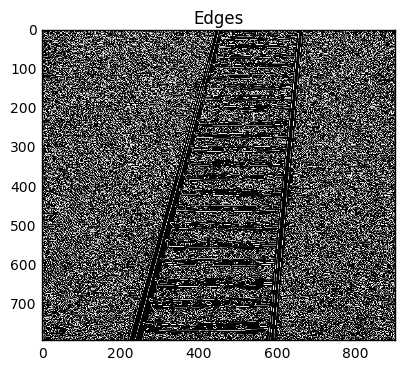

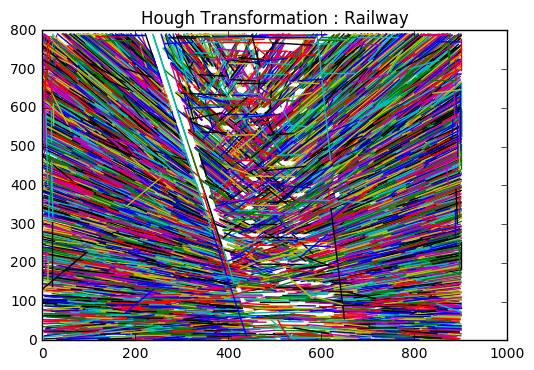

In [22]:
from skimage.transform import probabilistic_hough_line #Import all the needed function from the skimage library
from skimage.draw import line
from skimage import feature
from skimage.feature import canny

def Hough_trans(img): #Create a Hough_trans function
    edges = canny (img) #Apply a canny edge dectector
    LHough = probabilistic_hough_line(edges) #Use the probability Hough Transform on the 'edges' image
    return edges, LHough #Return the 'edges' image and the lines get from the Hough Transform

railway_edges, railway_hough = Hough_trans(railway_gray) #Apply the Hough transform

plt.figure() #Plot the 'edges' image and add a title
plt.imshow(railway_edges, cmap=plt.cm.gray)
plt.title('Edges')
plt.figure()
for line in railway_hough: #Use a for loop to plot all the lines from the Hough Transform and add a title
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.title('Hough Transformation : Railway')

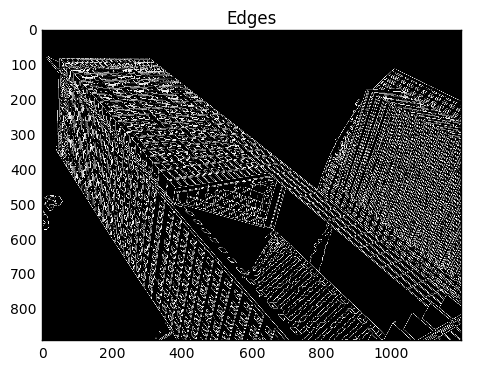

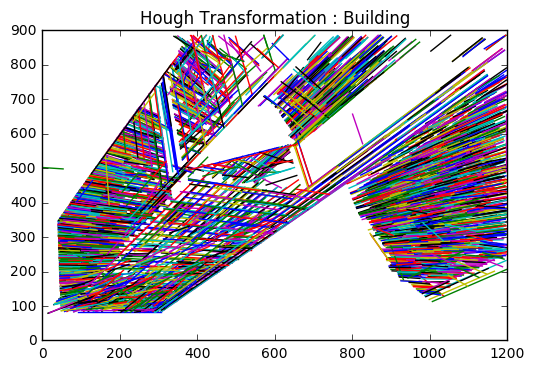

In [23]:
building_im = io.imread(Path.__add__('building.jpg')) #Import the building image, convert it into float and in grayscale
building_im = img_as_float(building_im)
building_gray = color.rgb2gray(building_im)

building_edges, building_hough = Hough_trans(building_gray) #Apply the Hough transformation

plt.figure() #Plot the 'edges' image and add a title
plt.imshow(building_edges, cmap=plt.cm.gray)
plt.title('Edges')
plt.figure()
for line in building_hough: #Use a for loop to plot all the lines from the Hough Transform and add a title
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.title('Hough Transformation : Building')